<h1>Moving TSEU to the next Organizing Level, a Proposal</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math
import statistics

from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
from IPython.display import Image, display
from IPython.display import Markdown as md
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

<h2>Background</h2>
<p>Texas State Employees Union (TSEU) is a Communications Workers of America local (6186).  The local represents State of Texas employees across the state.  TSEU collects most of its union dues through Payroll Deduction.  During the 84th Legislative Session (January 13, 2015 – June 1, 2015) TSEU began facing political headwinds that threatened dues collection via Payroll Deduction.   Senate Bill (SB) 1968 was filed and would revoke the ability for the local to use Payroll Deduction.  Fortunately, the bill died in committee at the end of the session.  The signaling was clear that TSEU’s opponents intended to file a new version of the bill in the 85th Legislative Session (January 10, 2017 – May 29, 2017).  Senate Bill 13 was filed but ultimately faced a similar demise as SB 1968.  After the second legislative defeat the push to revoke Payroll Deduction appear to lack the political will that it once enjoyed.
</p>
<p>
The period between January 2015 and June 2017 was a difficult period for the local.  A decision was taken to meet the challenge of organizing without Payroll Deduction by focusing on alternative payment methods, Bank Draft, Check, or Monthly Debit / Credit Card payments.  Additionally, a push would be made to convert as many existing members as possible to an alternative payment method.  New members would only be offered a method other than Payroll Deduction for dues payment.  This decision had a profound impact on the local’s membership and new signups.
</p>
<p>
New signups dropped off sharply and could not keep pace with monthly attrition and overall membership levels declined.  Fortunately, with the defeat of SB 13, Payroll Deduction appears to be safe from legislative action and membership levels have begun to recover.  It is during this recovery period that the local intends to look at new avenues for reaching prospective members.
</p>

<h2>Problem</h2>
<p>
Texas State Employees Union has managed to slow the decline in membership caused by the Bank Draft strategy.  With a return to Payroll Deduction as a means of dues collection Membership levels have started to stablize.  TSEU needs to find a way to increase the number of signups on a monthly basis.  TSEU hopes to do this by exploring the leverage that social media might bring to bear.
</p>

In [2]:
# Import the dues_summary data into a dataframe
dues_summary = pd.read_csv('dues_summary.csv')

# Adjust the data types to: categorical, numeric, or datetime

# Set datetime date
dues_summary['yr_mo'] = pd.to_datetime(dues_summary['yr_mo'])

# Set categorical data columns
dues_summary[['service_area','location_city','agency_abbreviation','location_name', 'location_code',
    'organizer_name']] = dues_summary[['service_area','location_city','agency_abbreviation','location_name',
    'location_code', 'organizer_name']].astype('category')

# Take a peek at the adjusted data types
dues_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54872 entries, 0 to 54871
Data columns (total 13 columns):
yr_mo                  54872 non-null datetime64[ns]
service_area           54872 non-null category
location_city          54872 non-null category
agency_abbreviation    54866 non-null category
location_name          54815 non-null category
location_code          54872 non-null category
organizer_name         54872 non-null category
paid                   54872 non-null int64
paid_plus_new          54872 non-null int64
signups                54872 non-null int64
paid_pd                54872 non-null int64
paid_bd                54872 non-null int64
paid_other             54872 non-null int64
dtypes: category(6), datetime64[ns](1), int64(6)
memory usage: 3.5 MB


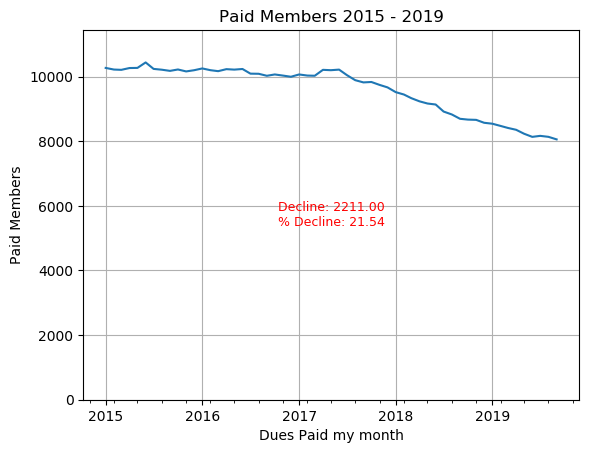

In [3]:
# Demonstrate the 'Paid' trend for the local
paid_summary = dues_summary.groupby(['yr_mo']).paid.sum()

# Figure out the amount of decline in membership
first_paid = paid_summary.head(1)[0]
last_paid = paid_summary.tail(1)[0]
decrease = first_paid - last_paid
pct_decrease = (decrease/first_paid)*100

plt.style.use('default')
fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

# ax = fig.add_axes([0.1,0.1,0.8,0.8]) # [x0,y0,width,height]
ax.xaxis.grid(True, which='major')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
ax.set_ylim(bottom=0, top=paid_summary.max()+1000)
ax.set_xlabel('Dues Paid my month')
ax.set_ylabel('Paid Members')
ax.set_title('Paid Members 2015 - 2019')

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
ax.text(0.5*(left+right), 0.5*(bottom+top), s=f"Decline: {decrease:.2f}\n% Decline: {pct_decrease:.2f}",
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=9, color='red',
        transform=ax.transAxes)

# ax.set_axis_off()
plt.plot(paid_summary);

<p>Over the past six months membership levels at generic location have started to stabalize and even grow.</p>

In [4]:
# Take a statistical look at the past six months dues by location versus the 2015 - 2019 period by location
# Run a stat bloc on the dues_summary dataframe
paid_all = dues_summary['paid']
paid_all_stats = dict(
    min=dues_summary['paid'].min(), 
    max=dues_summary['paid'].max(),
    mean=dues_summary['paid'].mean(), 
    median=dues_summary['paid'].median(), 
    mode=dues_summary['paid'].mode(), 
    range=dues_summary['paid'].max()-dues_summary['paid'].min(), 
    variance=dues_summary['paid'].var(),
    std_dev=dues_summary['paid'].std(), 
    std_err=dues_summary['paid'].std()/len(dues_summary)
)

paid_six_mths = dues_summary.loc[dues_summary['yr_mo']>'2019-03-01']
paid_six_mths_stats = dict(
    min=paid_six_mths['paid'].min(), 
    max=paid_six_mths['paid'].max(),
    mean=paid_six_mths['paid'].mean(), 
    median=paid_six_mths['paid'].median(), 
    mode=paid_six_mths['paid'].mode(), 
    range=paid_six_mths['paid'].max()-paid_six_mths['paid'].min(), 
    variance=paid_six_mths['paid'].var(),
    std_dev=paid_six_mths['paid'].std(), 
    std_err=paid_six_mths['paid'].std()/len(paid_six_mths)
)

paid_sept = dues_summary.loc[dues_summary['yr_mo']=='2019-09-01']
paid_sept_stats = dict(
    min=paid_sept['paid'].min(), 
    max=paid_sept['paid'].max(),
    mean=paid_sept['paid'].mean(), 
    median=paid_sept['paid'].median(), 
    mode=paid_sept['paid'].mode(), 
    range=paid_sept['paid'].max()-paid_sept['paid'].min(), 
    variance=paid_sept['paid'].var(),
    std_dev=paid_sept['paid'].std(), 
    std_err=paid_sept['paid'].std()/len(paid_sept)
)

generic_location = paid_sept[paid_sept['paid']<=20]
generic_location_stats = dict(
    min=generic_location['paid'].min(), 
    max=generic_location['paid'].max(),
    mean=generic_location['paid'].mean(), 
    median=generic_location['paid'].median(), 
    mode=generic_location['paid'].mode(), 
    range=generic_location['paid'].max()-generic_location['paid'].min(), 
    variance=generic_location['paid'].var(),
    std_dev=generic_location['paid'].std(), 
    std_err=generic_location['paid'].std()/len(generic_location)
)

location_info = dict(
    loc_more_than_one=len(paid_sept[paid_sept['paid']>=1]), 
    loc_more_than_one_membs=paid_sept.loc[paid_sept['paid']>=1,'paid'].sum(),
    loc_lt_eq_20=len(paid_sept[paid_sept['paid']<=20]),
    loc_lt_eq_20_membs=paid_sept.loc[paid_sept['paid']<=20,'paid'].sum(), 
    loc_gt_20=len(paid_sept[paid_sept['paid']>20]), 
    loc_gt_20_membs=paid_sept.loc[paid_sept['paid']>10,'paid'].sum(),
    loc_gt_50=len(paid_sept[paid_sept['paid']>50]),
    loc_gt_50_membs=paid_sept.loc[paid_sept['paid']>50,'paid'].sum(),
    loc_gt_100=len(paid_sept[paid_sept['paid']>100]),
    loc_gt_100_membs=paid_sept.loc[paid_sept['paid']>100,'paid'].sum(),
    loc_gt_200=len(paid_sept[paid_sept['paid']>200]), 
    loc_gt_200_membs=paid_sept.loc[paid_sept['paid']>200,'paid'].sum(),
)

md(f"""
<table style="margin-left:auto; margin-right:auto;" >
    <caption><em>Paid Membership Stat Bloc</em></caption>
    <tr>
        <th></th>
        <th>Paid 2015 - 2019</th>
        <th>Paid Six Months</th>
        <th>Paid September 2019</th>
        <th>Generic Location</th>
    </tr>
    <tr>
        <td>Min</td>
        <td>{paid_all_stats['min']}</td>
        <td>{paid_six_mths_stats['min']}</td>
        <td>{paid_sept_stats['min']}</td>
        <td>{generic_location_stats['min']}</td>
    </tr>
    <tr>
        <td>Max</td>
        <td>{paid_all_stats['max']}</td>
        <td>{paid_six_mths_stats['max']}</td>
        <td>{paid_sept_stats['max']}</td>
        <td>{generic_location_stats['max']}</td>
    </tr>
    <tr>
        <td>Mean</td>
        <td>{paid_all_stats['mean']}</td>
        <td>{paid_six_mths_stats['mean']}</td>
        <td>{paid_sept_stats['mean']}</td>
        <td>{generic_location_stats['mean']}</td>
    </tr>
    <tr>
        <td>Median</td>
        <td>{paid_all_stats['median']}</td>
        <td>{paid_six_mths_stats['median']}</td>
        <td>{paid_sept_stats['median']}</td>
        <td>{generic_location_stats['median']}</td>
    </tr>
    <tr>
        <td>Mode</td>
        <td>{paid_all_stats['mode'][0]}</td>
        <td>{paid_six_mths_stats['mode'][0]}</td>
        <td>{paid_sept_stats['mode'][0]}</td>
        <td>{generic_location_stats['mode'][0]}</td>
    </tr>
    <tr>
        <td>Range</td>
        <td>{paid_all_stats['range']}</td>
        <td>{paid_six_mths_stats['range']}</td>
        <td>{paid_sept_stats['range']}</td>
        <td>{generic_location_stats['range']}</td>
    </tr>
    <tr>
        <td>Variance</td>
        <td>{paid_all_stats['variance']}</td>
        <td>{paid_six_mths_stats['variance']}</td>
        <td>{paid_sept_stats['variance']}</td>
        <td>{generic_location_stats['variance']}</td>
    </tr>
    <tr>
        <td>Standard Deviation</td>
        <td>{paid_all_stats['std_dev']}</td>
        <td>{paid_six_mths_stats['std_dev']}</td>
        <td>{paid_sept_stats['std_dev']}</td>
        <td>{generic_location_stats['std_dev']}</td>
    </tr>
    <tr>
        <td>Standard Error</td>
        <td>{paid_all_stats['std_err']}</td>
        <td>{paid_six_mths_stats['std_err']}</td>
        <td>{paid_sept_stats['std_err']}</td>
        <td>{generic_location_stats['std_err']}</td>
    </tr>
</table>
<p>If you refer to the table below you can see that the majority of paid members are clusted at locations with less than 20 members. </p>
<table style="margin-left:auto; margin-right:auto;" >
    <caption><em>Location Profile</em></caption>
    <tr>
        <th>Paid</th>
        <th>Count</th>
        <th>Members</th>
    </tr>
    <tr>
        <td>Members >= 1</td>
        <td>{location_info['loc_more_than_one']}</td>
        <td>{location_info['loc_more_than_one_membs']}</td>
    </tr>
    <tr>
        <td>Members <= 20</td>
        <td>{location_info['loc_lt_eq_20']}</td>
        <td>{location_info['loc_lt_eq_20_membs']}</td>
    </tr>
    <tr>
        <td>Members > 20</td>
        <td>{location_info['loc_gt_20']}</td>
        <td>{location_info['loc_gt_20_membs']}</td>
    </tr>
    <tr>
        <td>Members > 50</td>
        <td>{location_info['loc_gt_50']}</td>
        <td>{location_info['loc_gt_50_membs']}</td>
    </tr>
    <tr>
        <td>Members > 100</td>
        <td>{location_info['loc_gt_100']}</td>
        <td>{location_info['loc_gt_100_membs']}</td>
    </tr>
    <tr>
        <td>Members > 200</td>
        <td>{location_info['loc_gt_200']}</td>
        <td>{location_info['loc_gt_200_membs']}</td>
    </tr>
</table>
<p>We can take a look at the most common locaiton sizes to get a feel for the number of members we are grappling with at a generic location</p>
""")


<table style="margin-left:auto; margin-right:auto;" >
    <caption><em>Paid Membership Stat Bloc</em></caption>
    <tr>
        <th></th>
        <th>Paid 2015 - 2019</th>
        <th>Paid Six Months</th>
        <th>Paid September 2019</th>
        <th>Generic Location</th>
    </tr>
    <tr>
        <td>Min</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Max</td>
        <td>302</td>
        <td>294</td>
        <td>290</td>
        <td>20</td>
    </tr>
    <tr>
        <td>Mean</td>
        <td>9.96557442775915</td>
        <td>8.679518924655111</td>
        <td>8.400417101147028</td>
        <td>4.060295790671217</td>
    </tr>
    <tr>
        <td>Median</td>
        <td>3.0</td>
        <td>2.0</td>
        <td>2.0</td>
        <td>2.0</td>
    </tr>
    <tr>
        <td>Mode</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Range</td>
        <td>302</td>
        <td>294</td>
        <td>290</td>
        <td>20</td>
    </tr>
    <tr>
        <td>Variance</td>
        <td>589.8890847641924</td>
        <td>430.91655550883536</td>
        <td>406.4115238341928</td>
        <td>18.970164377100588</td>
    </tr>
    <tr>
        <td>Standard Deviation</td>
        <td>24.28763234167119</td>
        <td>20.75852970489084</td>
        <td>20.159650885722023</td>
        <td>4.355475218285668</td>
    </tr>
    <tr>
        <td>Standard Error</td>
        <td>0.00044262342071860314</td>
        <td>0.003671476778367676</td>
        <td>0.021021533770304506</td>
        <td>0.004955034378026926</td>
    </tr>
</table>
<p>If you refer to the table below you can see that the majority of paid members are clusted at locations with less than 20 members. </p>
<table style="margin-left:auto; margin-right:auto;" >
    <caption><em>Location Profile</em></caption>
    <tr>
        <th>Paid</th>
        <th>Count</th>
        <th>Members</th>
    </tr>
    <tr>
        <td>Members >= 1</td>
        <td>940</td>
        <td>8056</td>
    </tr>
    <tr>
        <td>Members <= 20</td>
        <td>879</td>
        <td>3569</td>
    </tr>
    <tr>
        <td>Members > 20</td>
        <td>80</td>
        <td>5864</td>
    </tr>
    <tr>
        <td>Members > 50</td>
        <td>26</td>
        <td>2750</td>
    </tr>
    <tr>
        <td>Members > 100</td>
        <td>8</td>
        <td>1372</td>
    </tr>
    <tr>
        <td>Members > 200</td>
        <td>1</td>
        <td>290</td>
    </tr>
</table>
<p>We can take a look at the most common locaiton sizes to get a feel for the number of members we are grappling with at a generic location</p>


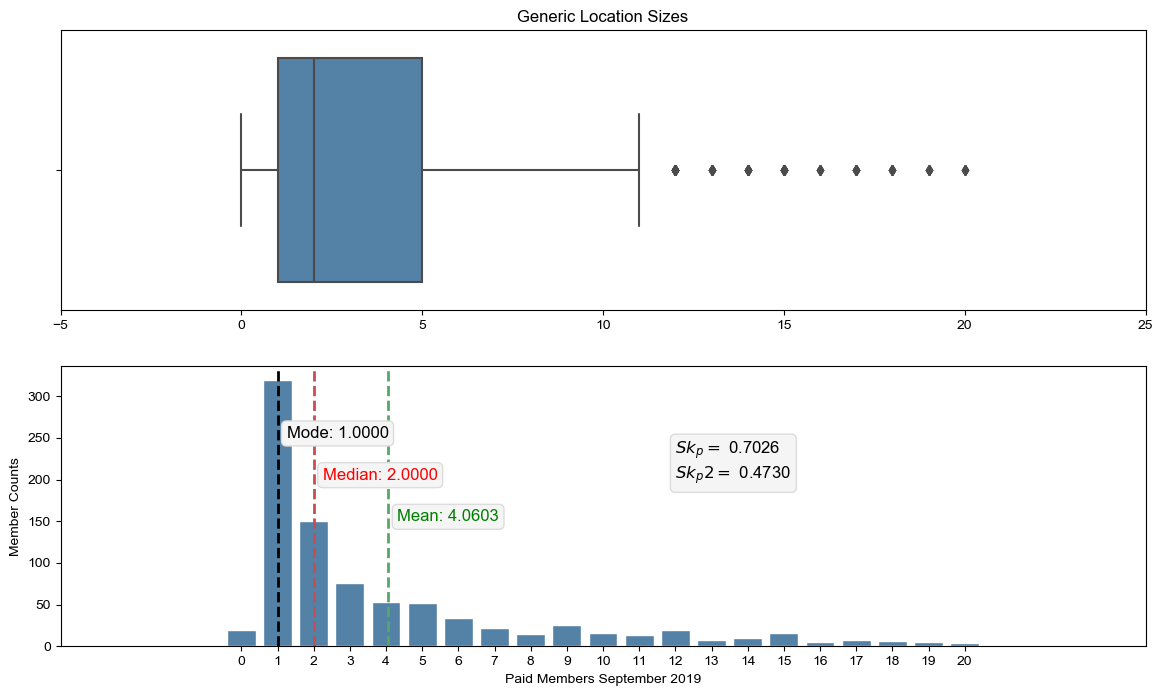

In [5]:
# Paid
min_paid = generic_location['paid'].min()
max_paid = generic_location['paid'].max()
mean_paid = generic_location['paid'].mean()
range_paid = generic_location_stats['range']

quartile_dict = generic_location['paid'].quantile([0.25,0.5,0.75]).to_dict()
iqr_paid = quartile_dict[0.75] - quartile_dict[0.25]
min_paid_fence = quartile_dict[0.25] - (iqr_paid*1.5)
max_paid_fence = quartile_dict[0.75] + (iqr_paid*1.5)
mode_paid = generic_location['paid'].mode()
outlier_count = generic_location[generic_location['paid']>max_paid_fence]['paid'].count()
outlier_percentage = outlier_count/generic_location['paid'].count()

# plt.figure(figsize=(16,6))

# sns.set(style="whitegrid")
# ax = sns.boxplot(x=generic_location['paid'])
# # ax.set(xlim=(min_paid_fence, max_paid_fence))
# ax.set(xlabel='Location Size September 2019 (Members)')

# # Plot and display the Mean
# plt.axvline(mean_paid, color='g', linestyle='dashed', linewidth=2)
# plt.text(mean_paid+0.15, -0.05, f"Mean: {mean_paid:.4f}", 
#     rotation=0, fontdict=dict(color='green', 
#         bbox=dict(boxstyle='round', 
#             ec='gainsboro', 
#             fc='whitesmoke')))

# # Plot and display the Median
# plt.axvline(quartile_dict[0.50], color='r', linestyle='dashed', linewidth=2)
# plt.text((quartile_dict[0.50])+0.15, -0.15, f"Median: {quartile_dict[0.50]:.4f}",
#     rotation=0, fontdict=dict(color='red'), 
#          bbox=dict(boxstyle='round',
#             ec='gainsboro',
#             fc='whitesmoke'))

# # Plot and display the Mode
# plt.axvline(mode_paid[0], color='black', linestyle='dashed', linewidth=2)
# plt.text(mode_paid+0.15, -0.25, f"Mode: {mode_paid[0]:.4f}", 
#     rotation=0, fontdict=dict(color='black', 
#         bbox=dict(boxstyle='round', 
#             ec='gainsboro', 
#             fc='whitesmoke')))

# plt.title('Location Boxplot')

# skp = (generic_location_stats['mean']-generic_location_stats['mode'][0])/generic_location_stats['std_dev']
# skp2 = (generic_location_stats['mean']-generic_location_stats['median'])/generic_location_stats['std_dev']
# plt.text(x=10,y=-0.30,s=f'$ Sk_p = $ {skp:.4f} \n$ Sk_p2 = $ {skp2:.4f}', 
#     fontdict=dict(color='black', 
#         bbox=dict(boxstyle='round', 
#             ec='gainsboro', 
#             fc='whitesmoke'))
# )

# plt.figure(figsize=(16,6))
# plt.hist(generic_location['paid'], bins=10)
# plt.xlabel("Location Size September 2019 (Members)")
# plt.ylabel("Member Count")
# plt.show();

fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(14,8)
# fig.figsize=(16,6)

sns.set(style="whitegrid")
plot1 = sns.boxplot(x=generic_location['paid'], ax=axs[0], color="steelblue", )
plot1.set(xlim=(min_paid_fence, (generic_location['paid'].max())+5), xlabel=None, 
    title="Generic Location Sizes")

plot2 = sns.countplot(x='paid', data=generic_location, ax=axs[1], color="steelblue")
plot2.set(xlim=(min_paid_fence, (generic_location['paid'].max())+5), xlabel="Paid Members September 2019", 
    ylabel="Member Counts")

# Plot and display the Mean
plt.axvline(mean_paid, color='g', linestyle='dashed', linewidth=2)
plt.text(mean_paid+0.25, +150, f"Mean: {mean_paid:.4f}", 
    rotation=0, fontdict=dict(color='green', 
        bbox=dict(boxstyle='round', 
            ec='gainsboro', 
            fc='whitesmoke')))

# Plot and display the Median
plt.axvline(quartile_dict[0.50], color='r', linestyle='dashed', linewidth=2)
plt.text((quartile_dict[0.50])+0.25, +200, f"Median: {quartile_dict[0.50]:.4f}",
    rotation=0, fontdict=dict(color='red'), 
         bbox=dict(boxstyle='round',
            ec='gainsboro',
            fc='whitesmoke'))

# Plot and display the Mode
plt.axvline(mode_paid[0], color='black', linestyle='dashed', linewidth=2)
plt.text(mode_paid+0.25, +250, f"Mode: {mode_paid[0]:.4f}", 
    rotation=0, fontdict=dict(color='black', 
        bbox=dict(boxstyle='round', 
            ec='gainsboro', 
            fc='whitesmoke')))

# Show the skewness calculations
skp = (generic_location_stats['mean']-generic_location_stats['mode'][0])/generic_location_stats['std_dev']
skp2 = (generic_location_stats['mean']-generic_location_stats['median'])/generic_location_stats['std_dev']
plt.text(x=12,y=200,s=f'$ Sk_p = $ {skp:.4f} \n$ Sk_p2 = $ {skp2:.4f}', 
    fontdict=dict(color='black', 
        bbox=dict(boxstyle='round', 
            ec='gainsboro', 
            fc='whitesmoke'))
)

plt.show();

<p>As illustrated above, location membership is positively skewed where the local has a lot of locations with few members.  For those locations take a look at membership levels over the last six months.</p>

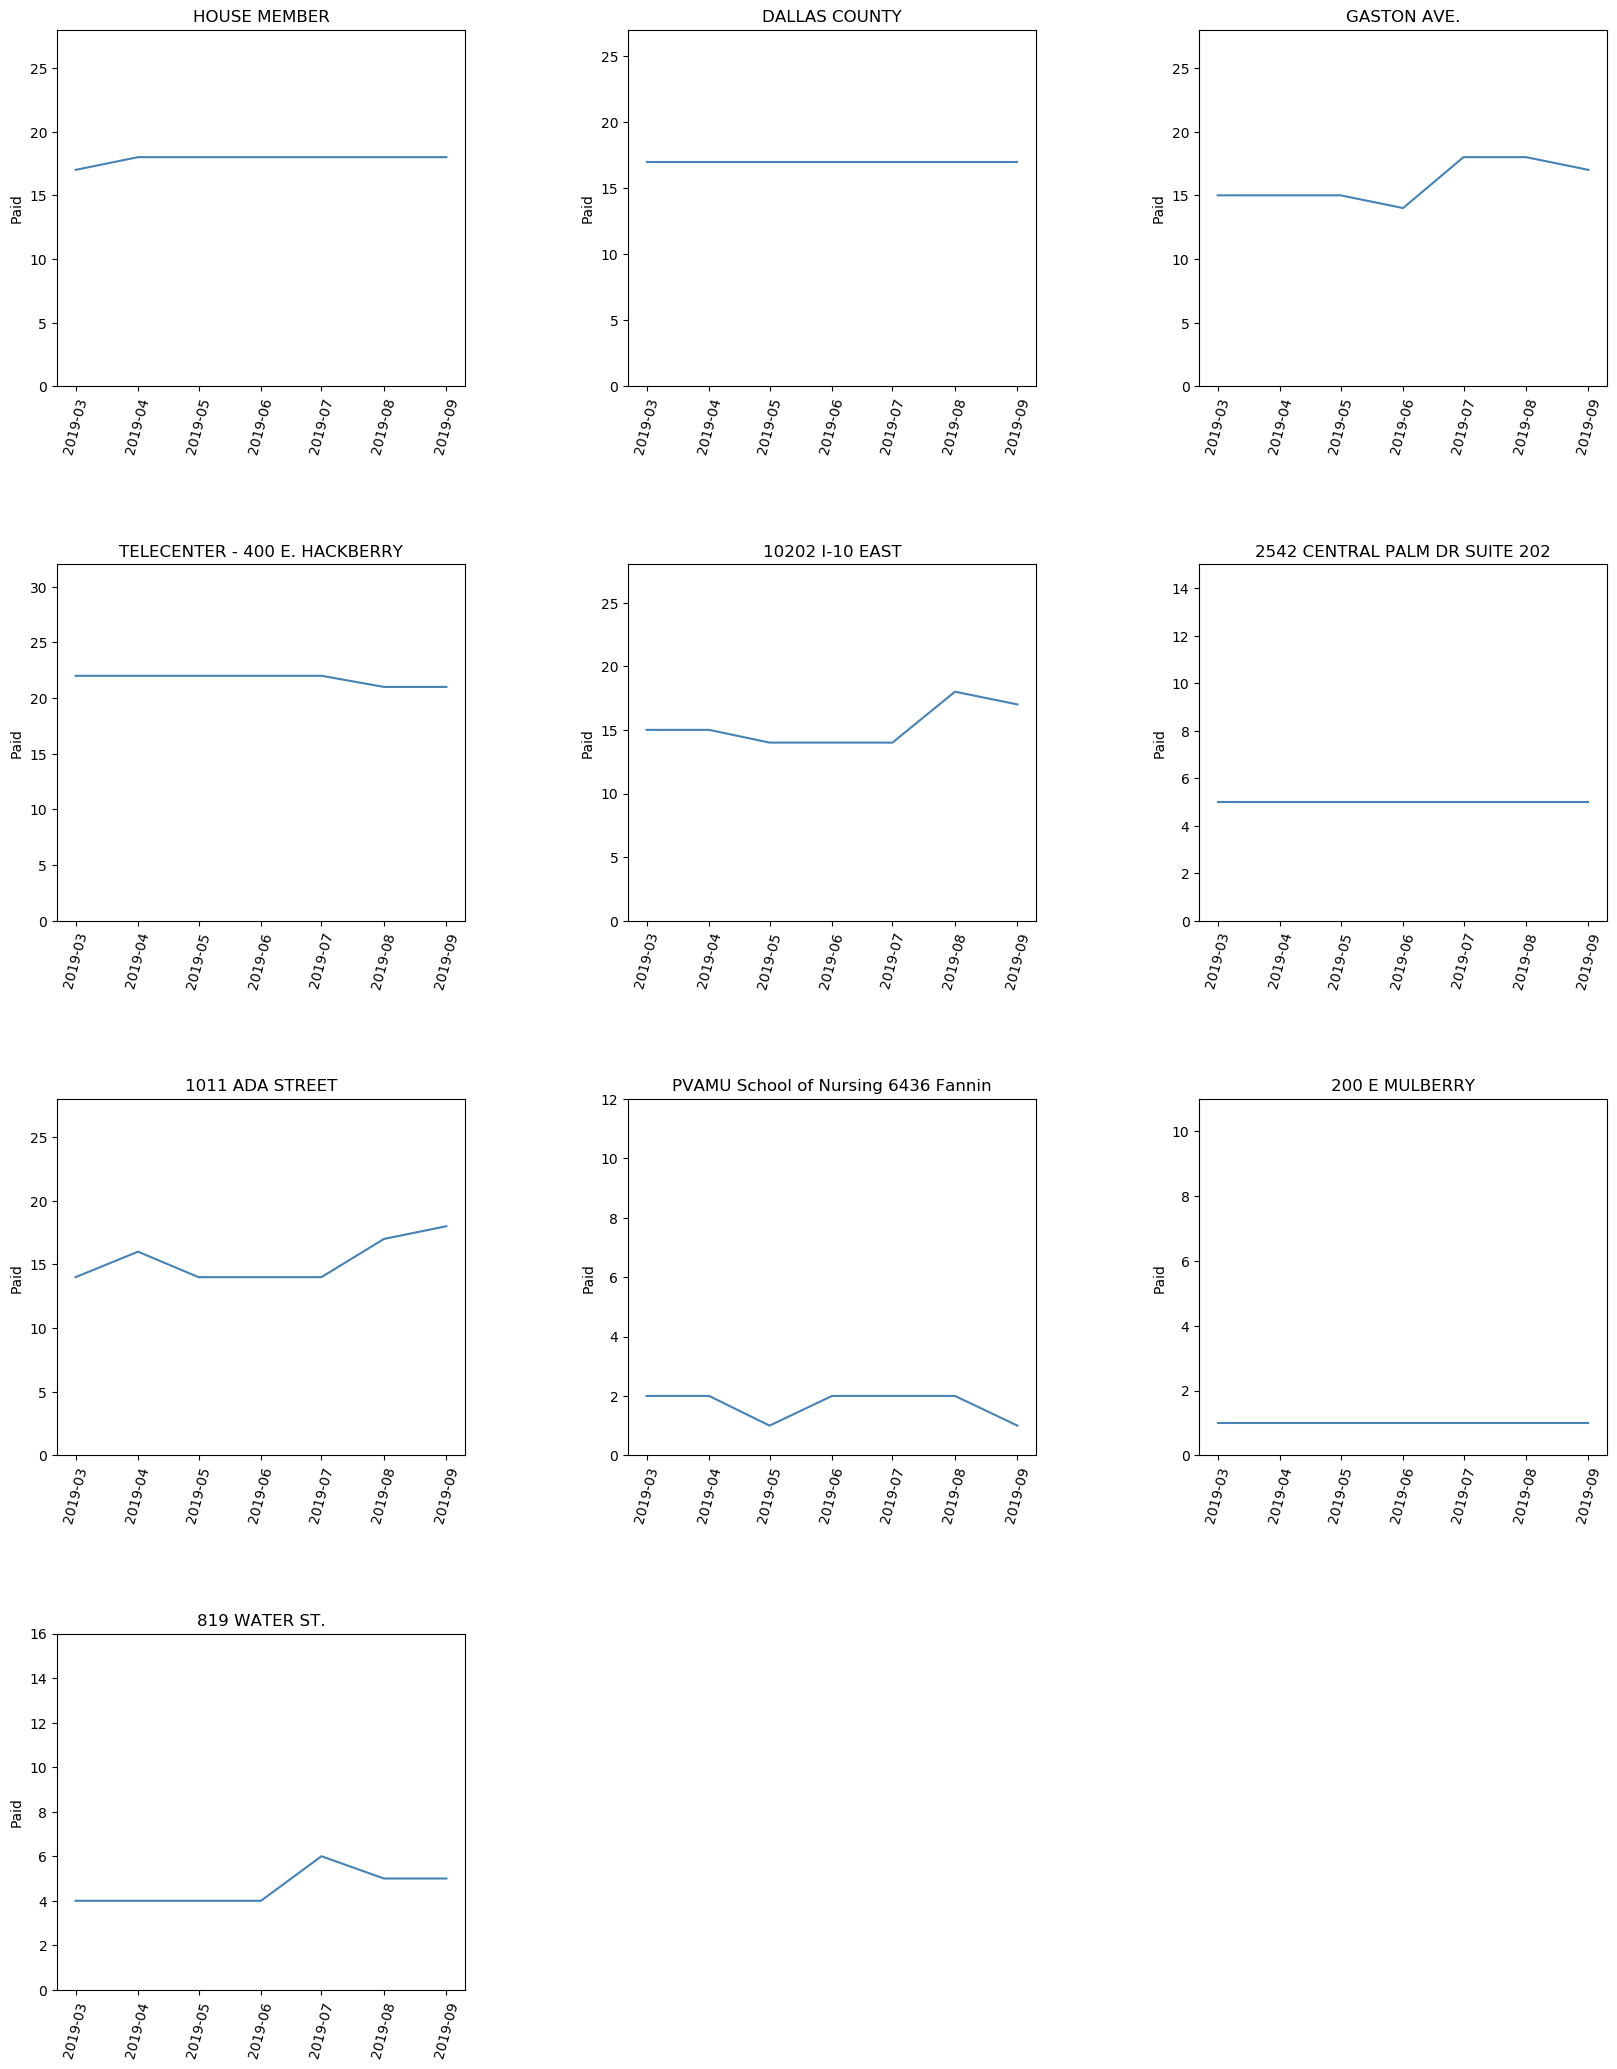

In [6]:
# Get the Top 5 locations
# top_locations = select_locations.nlargest(5,columns='paid')
top_locations = generic_location.loc[generic_location['paid']>15].sample(n=5)

#  Get the Bottom 5 locations
# bottom_locations = select_locations.nsmallest(5,columns='paid')
bottom_locations = generic_location.loc[generic_location['paid']<15].sample(n=5)

# Create a unified dataframe of top and bottom locations
top_and_bottom = pd.concat([top_locations,bottom_locations])

# Create a list of location codes to pass to the plotting loop
locs = list(top_and_bottom['location_code'].unique())
selected_dues = dues_summary.loc[(dues_summary['yr_mo']>'2019-02-01')]
top_and_bottom = selected_dues.loc[selected_dues['location_code'].isin(locs)]

# Create a series of plots to illustrate location membership levels for the past six months
plt.style.use('default')
plt.figure(figsize=(20,20))

for e in locs:
    # print(f'{locs.index(e)+1}, {e}')
    
    plt.subplot(4,3,locs.index(e)+1)
    y = top_and_bottom.loc[top_and_bottom['location_code'].isin([e])].groupby(['yr_mo'],).paid.agg(['sum'])
    plt.plot(y['sum'], color='steelblue')
    plt.xticks(rotation=75)
    plt.ylim(bottom=0, top=y.max()[0]+10)
    plt.ylabel('Paid')
    loc_name = top_and_bottom.query(f'location_code=={e}')['location_name'].head(1)
    plt.title(loc_name.values[0])

plt.subplots_adjust(top=0.99,bottom=0.01, hspace=0.5, wspace=0.4)
plt.show();

<p>These locations are selected at random from locaions with 20 or fewer members and demonstrate the membership levels at these location has been fairly stable.</p>

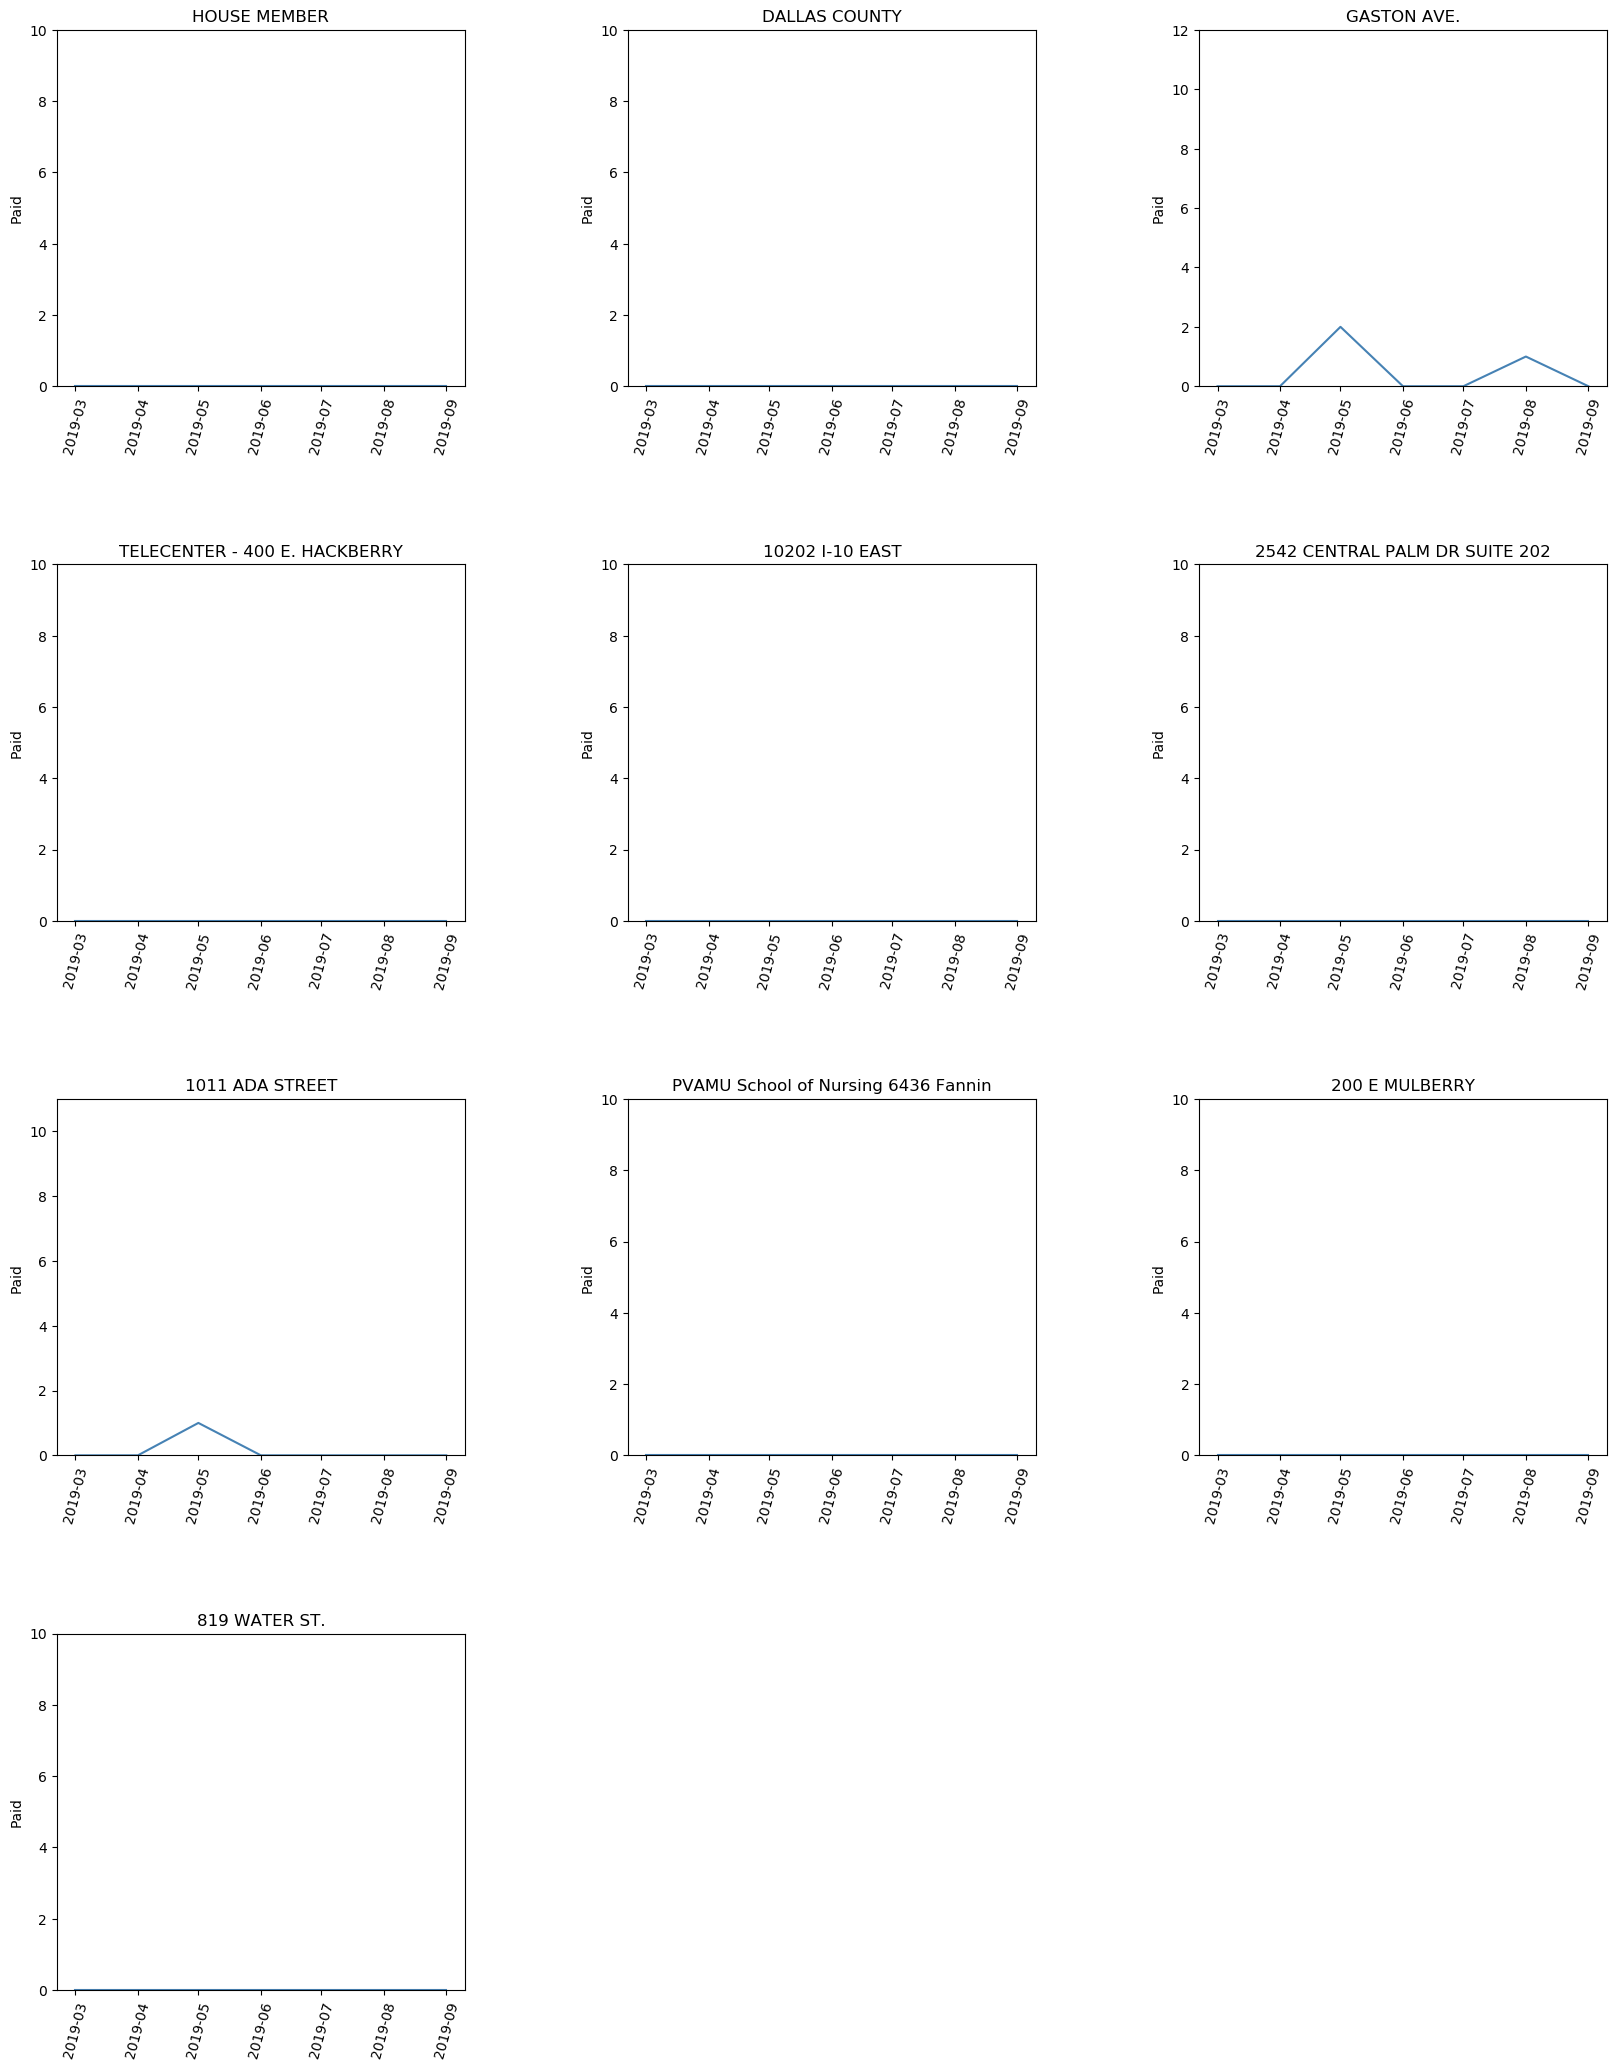

In [8]:
# Take a look at sign-ups at these same locations

# Create a series of plots to illustrate location membership levels for the past six months
plt.style.use('default')
plt.figure(figsize=(20,20))

for e in locs:
    # print(f'{locs.index(e)+1}, {e}')
    
    plt.subplot(4,3,locs.index(e)+1)
    y = top_and_bottom.loc[top_and_bottom['location_code'].isin([e])].groupby(['yr_mo'],).signups.agg(['sum'])
    plt.plot(y['sum'], color='steelblue')
    plt.xticks(rotation=75)
    plt.ylim(bottom=0, top=y.max()[0]+10)
    plt.ylabel('Paid')
    loc_name = top_and_bottom.query(f'location_code=={e}')['location_name'].head(1)
    plt.title(loc_name.values[0])

plt.subplots_adjust(top=0.99,bottom=0.01, hspace=0.5, wspace=0.4)
plt.show();

<p>Across locations sign-ups are flat to non-existent, consequently, membership not growing.  This is not a good position for the local to be in as another election year approaches.</p>

<h2>Hypothesis</h2>
<p>
TSEU is once again able to offer Payroll Deduction as the primary means of dues collection for its members.  It is believed that by leveraging social media TSEU will be able increase the number of monthly signups and improve overall membership levels.  The local hopes to test this theory in the following manner.
</p>

<h2>Method of Testing</h2>
<p>
<strong>Overview: </strong>The organizing staff visits work locations on a monthly basis.  During those visits they come equipped with sign-in sheets that are used to collect contact information.  Presently, the information gathered on the sign-in sheets remains with the organizers. During the testing month the organizing staff will supply the sign-in sheet data to the Membership office who will add the contact information to the Membership database.  Once input the email addresses will be split into two groups.  The control group will be retained in the database without further action.  The treatment group will be used as a basis for a Facebook advertising campaign.  The advertising campaign will start two weeks after the beginning of the experiment month and will continue until two weeks after the end of the test month.  At the end of the month following the testing month, a statistical review will be presented on the findings of the experiment.
</p>
<p>
<strong>Rollout Plan: </strong>The month before the test month each organizer will be provided with the format for the sign-in sheet used at work locations.  The sign-in sheet will collect the following information: Organizer Name, Location Visit Date, Location Name, First Name, Last Name, Phone Number, and Email.  A new table (contacts) will be added to the Membership database.  The database table will store the information collected from sign-in sheets plus additional metadata.  The metadata columns will include a column denoting whether the record is part of the control group or the treatment group, first Facebook ad date, and date added to Facebook group.  Organizers will submit electronic sign-in sheets to the Membership office daily, the number and frequency of the submissions will also be tracked.  A sorting algorithm will be written to randomly select entries on the 'contacts' table into the treatment group or the control group.  Once a group selection is made it will not be overwritten.  On a weekly basis a new Facebook ad will be purchased and sent to the entries on the 'contacts' table that have been selected into the treatment group.  
</p>

<h2>Evaluation Plan</h2>
<p>
Upon completion of the experiment a statistical analysis will be performed to determine the success or failure of the campaign.  TSEU will be looking for improvement of several measures.  TSEU is looking for a higher conversion rate for the control group.  The local is looking for 2% higher rate for the treatment group over the control group.  The local will also examine other axes looking for changes in organizing efforts.  TSEU would like to see an increase in the ratio of Sign-ups to Drops which is an indicator of the local’s ability to grow.  The local also used the information added to the 'contacts' table to measure Organizer performance.  Who submitted the most / fewest contacts during the test period and what were their conversion rates?  Conversion rates for all the Organizing staff will be examined.  Finally, a decision will also be taken about whether Facebook advertising will be included as a part of regular organizing activity.
</p>